# DS-SF-42 | 03 | Exploratory Data Analysis | Codealong | Starter Code

In this code-along we will need the seaborn plotting package. Seaborn is built-around matplotlib to make some functionality much more user friendly.

To install a package, open terminal (or git-bash for Windows users).

Run:

```bash
conda install -y seaborn
```

Conda is a package manager, similar to `pip`.

In [4]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Independent Review (20 minutes) | The _pandas_ Library

In [87]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]})\
        .set_index('name')

In [84]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


The following exerices that are marked with <font color="blue">(INDPENDENT)</font> are review of the Pandas material from Thursday. Take a stab at doing them on your own. Feel free to use the [inclass notebook](https://github.com/ga-students/DS-SF-42/blob/master/classes/02/notebooks/INCLASS-codealong-02-the-pandas-library-starter-code.ipynb) as a reference.

> ### <font color="blue">(INDPENDENT)</font> Question 1.  Subset the dataframe on the age and gender columns

In [9]:
# TODO
df[['age', 'gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### <font color="blue">(INDPENDENT)</font> Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [11]:
# TODO (DataFrame)
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [13]:
# TODO (Series)
df['age']

pandas.core.series.Series

> ### <font color="blue">(INDPENDENT)</font> Question 3.  Subset the dataframe on the rows Bob and Carol

In [89]:
# TODO
df.loc[['Bob', 'Carol']]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### <font color="blue">(INDPENDENT)</font> Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [12]:
# TODO (DataFrame)
df.loc[['Eve']]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [13]:
# TODO (Series)
df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### <font color="blue">(INDPENDENT)</font> Question 5.  How old is Frank?

In [18]:
# TODO
df.loc[['Frank']].age

name
Frank    43
Name: age, dtype: int64

> ### <font color="blue">(INDPENDENT)</font> Question 6.  What is the men’s mean age, the women’s median age?

In [91]:
# TODO
maleMask = df['gender'] == 'Male'
print "Male mean age"
print df[maleMask].age.mean()

femaleMask = df['gender'] == 'Female'
print "\n\nFemale median age"
print df[femaleMask].age.median()

Male mean age
39.3333333333


Female median age
44.0


## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [95]:
df = pd.read_csv('../datasets/dataset-04-zillow.csv', index_col = 'ID')
df.head()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.71,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.15,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.60,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.50,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.97,0.0,2.0,2.0,1299.0,NaN,1993.0


### `Series.mean()` - Compute the `Series` mean value

In [33]:
df.SalePrice.mean()

1.3974229429999998

> #### Activity: What's `Size`'s mean?

In [35]:
# TODO
df.Size.mean()

1641.3009307135471

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [109]:
# TODO
studioCount = len(df.loc[df.IsAStudio == 1])
print studioCount / float(len(df))
print df.size
print len(df)


0.029
9000
1000


### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [50]:
# TODO
df.mean()

SalePrice         1.397423
IsAStudio         0.029412
Beds              2.572967
Baths             1.977548
Size           1641.300931
LotSize        3020.640288
BuiltInYear    1947.533333
dtype: float64

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [51]:
# TODO
df.var()

SalePrice      3.015131e+00
IsAStudio      2.857569e-02
Beds           1.564729e+00
Baths          1.277654e+00
Size           1.054762e+06
LotSize        8.142064e+06
BuiltInYear    1.445639e+03
dtype: float64

> #### Activity: What's the variance for the number of beds in the dataset?

In [52]:
# TODO
df.Beds.var()

1.5647293928888621

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [53]:
# TODO

df.std()

SalePrice         1.736413
IsAStudio         0.169043
Beds              1.250891
Baths             1.130334
Size           1027.016175
LotSize        2853.430139
BuiltInYear      38.021563
dtype: float64

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [54]:
# TODO
df.Beds.std()

1.2508914392899417

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [110]:
# TODO
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

> #### Activity: What's the median sale price for properties in the dataset?

In [8]:
# TODO
df.SalePrice.median()

1.1

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [42]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [47]:
df.IsAStudio.count()


986

Which leaves 14 houses for which we don't know if they are studios or not.

In [44]:
df.IsAStudio.dropna().shape[0]+ df.IsAStudio.isnull().sum()

1000

In [45]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [48]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                           1e-06
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

In [49]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                           32.7
IsAStudio                              1
Beds                                   9
Baths                                 14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the lowest price?  At what price?

In [53]:
# TODO
min = df.SalePrice.min()
df.loc[df.SalePrice == min]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,0.000001,0.0,7.0,6.0,2904.0,2482.0,1900.0


> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the highest price?  At what price?

In [54]:
# TODO
max = df.SalePrice.max()
df.loc[df.SalePrice == max]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32.7,0.0,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

In [119]:
df.quantile(.5)

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
Name: 0.5, dtype: float64

# By definition, the median is the 50% quantile.

In [56]:
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

In [57]:
df.quantile(.25)

SalePrice         0.8
IsAStudio         0.0
Beds              2.0
Baths             1.0
Size           1027.5
LotSize        2375.0
BuiltInYear    1912.0
Name: 0.25, dtype: float64

In [58]:
df.quantile(.75)

SalePrice         1.5325
IsAStudio         0.0000
Beds              3.0000
Baths             2.0000
Size           1947.5000
LotSize        3049.0000
BuiltInYear    1986.0000
Name: 0.75, dtype: float64

### `.describe()` - Generate various summary statistics

In [59]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,0.800000,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,1.100000,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,1.532500,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,32.700000,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [60]:
df.SalePrice.describe()

count    1000.000000
mean        1.397423
std         1.736413
min         0.000001
25%         0.800000
50%         1.100000
75%         1.532500
max        32.700000
Name: SalePrice, dtype: float64

In [61]:
df.Address.describe()

count                                        1000
unique                                        993
top       1954 Golden Gate Ave, San Francisco, CA
freq                                            2
Name: Address, dtype: object

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

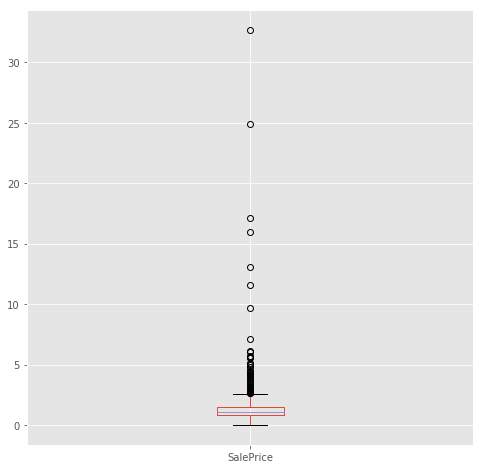

In [62]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

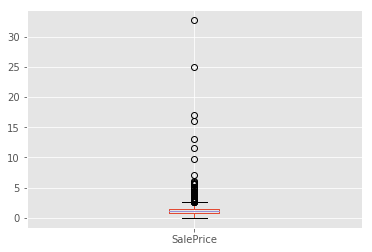

In [63]:
df[['SalePrice']].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

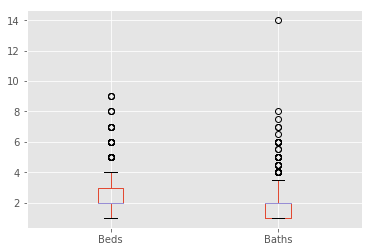

In [64]:
# TODO
df[['Beds', 'Baths']].boxplot(figsize = (8, 8))

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

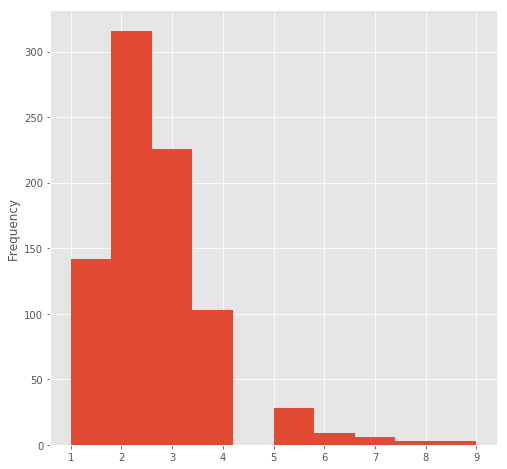

In [65]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

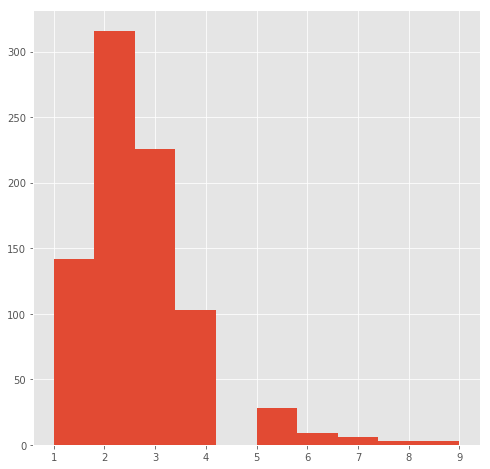

In [66]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ad2790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111c5b9d0>]], dtype=object)

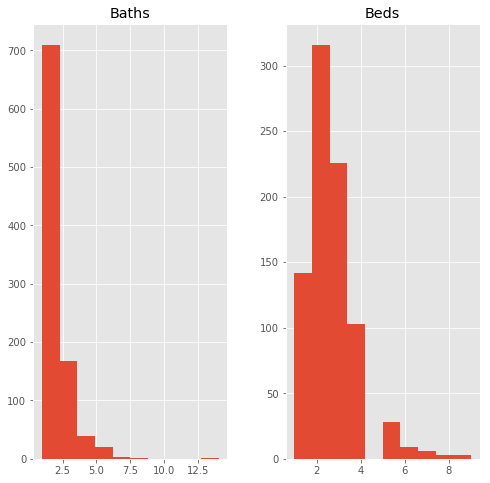

In [67]:
# TODO
df[['Beds', 'Baths']].hist(figsize = (8,8))

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [68]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1.1,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [70]:
df.Baths.mode()

0    1.0
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [71]:
df.corr()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [72]:
df.Beds.corr(df.Baths)

0.7151938843208987

### Heatmaps

In [73]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO

Let's pretty this up using the seaborn package.

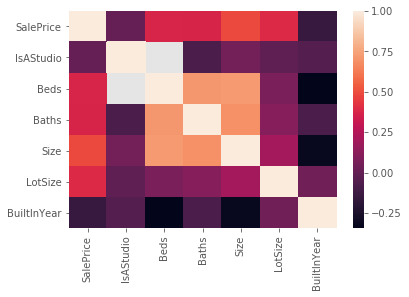

In [74]:
sns.heatmap(corr)

### Scatter plots

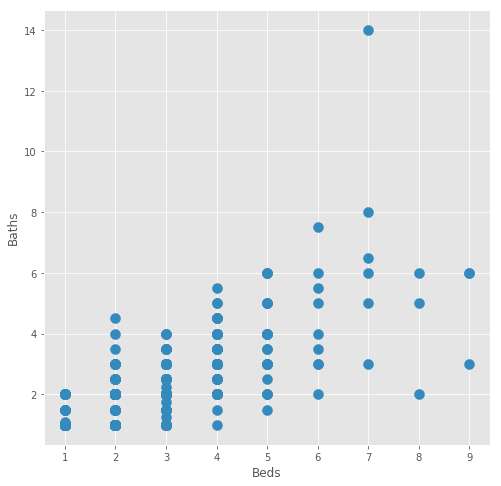

In [75]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

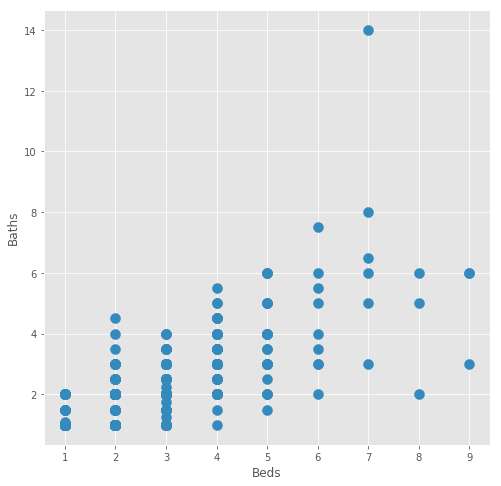

In [76]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Pair scatterplots with Seaborn

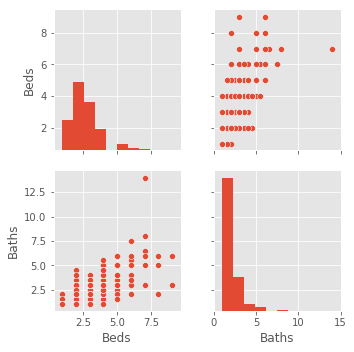

In [77]:
sns.pairplot(df[['Beds', 'Baths']].dropna())

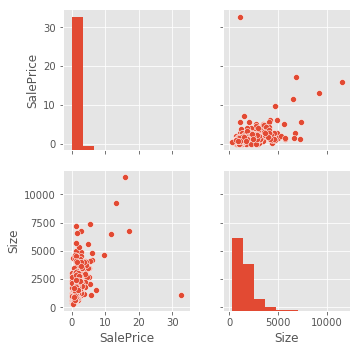

In [78]:
sns.pairplot(df[['SalePrice', 'Size']].dropna())

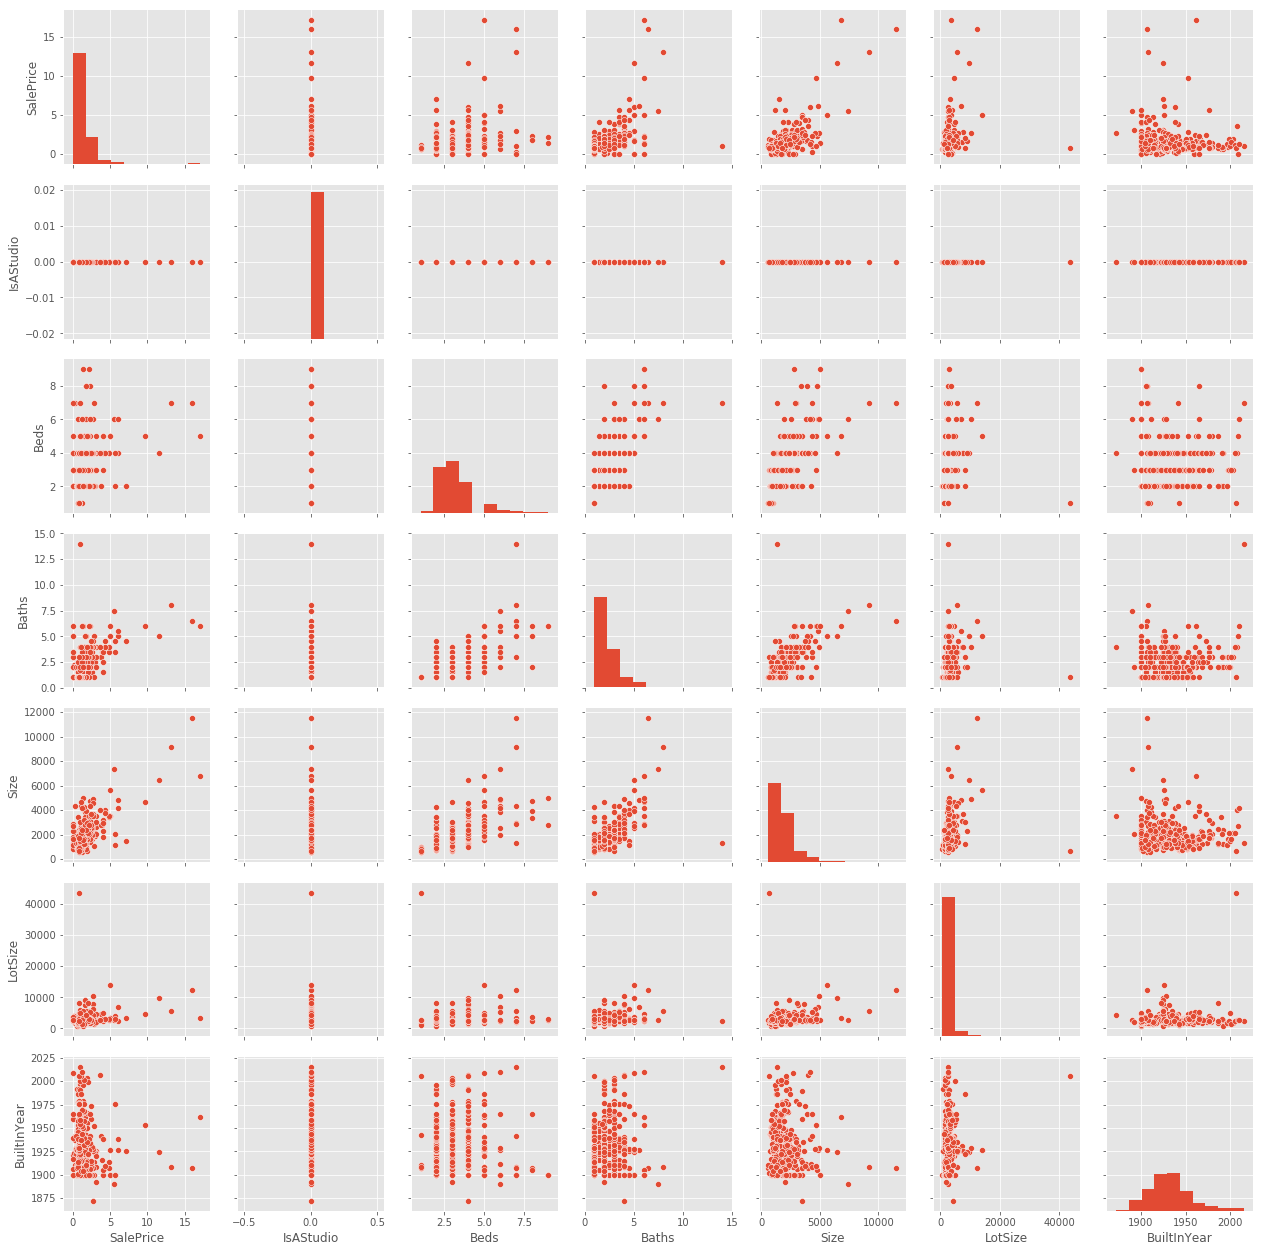

In [81]:
sns.pairplot(df.dropna())

### <font color="blue">Check</font> - why are plots along the diagonal not scatters?

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: Beds, dtype: int64

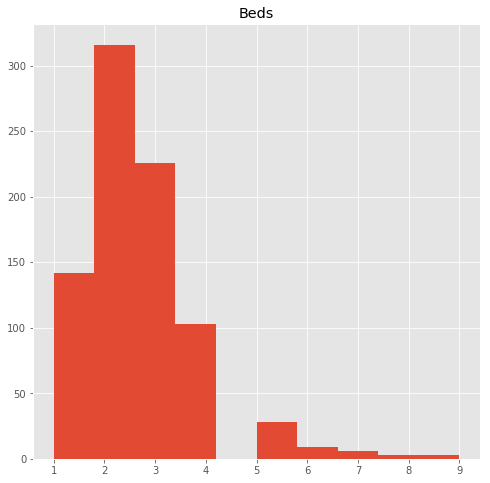

In [113]:
# TODO
df[['Beds']].hist(figsize = (8,8))
df["Beds"].value_counts()

> Careful on checking for `NaN` values!

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the century the houses were built

In [ ]:
# TODO